In [1]:
#The path file assumes you have a directory structure with cmdstanpy sitting at the top with subdirectories 
from paths import *

The route directory: direc: C:\Users\n_1ho\Documents\biodiversity_model_final_kelvin\cmdstanpy\
Will get code from: codepath: C:\Users\n_1ho\Documents\biodiversity_model_final_kelvin\cmdstanpy\code
Will send code to: outpath: C:\Users\n_1ho\Documents\biodiversity_model_final_kelvin\cmdstanpy\output
If data is needed it will look in: datapath:  C:\Users\n_1ho\Documents\biodiversity_model_final_kelvin\cmdstanpy\data2


In [2]:
import cmdstanpy
from cmdstanpy import CmdStanModel
from stancodes import *  #This file is in the code directory, is in the code directory

In [3]:
#Compile the HB stan code, will only do this once
stan_file = join(codepath,'HBL5.stan')
model = CmdStanModel(stan_file=stan_file)

In [4]:
sys.path.append(datapath)
from bio3loadindata3 import *

In [5]:
x=[array(X0_30),array(X1_30),array(X2_30)]
#for i in range(3):
    #x[i][:,1:-1]=x[i][:,1:-1]/60
    #x[i][:,0]=x[i][:,0]/5

In [6]:
x[1]

array([[-1.        ,  0.41666667,  1.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.3       ,  0.        ,  0.75      , ...,  0.58333333,
         0.        ,  0.        ],
       [-1.        ,  0.16666667,  0.75      , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.05      ,  0.75      ,  0.16666667, ...,  0.        ,
         0.        ,  0.        ],
       [-1.        ,  0.        ,  0.        , ...,  0.        ,
         0.75      ,  0.        ],
       [-1.        ,  0.        ,  0.58333333, ...,  0.        ,
         1.        ,  0.        ]])

In [7]:
Y=y30+1
ids=id30
N=int(max(ids))
T=len(Y)
K=shape(X0_30)[1]
[N,T,K]

[201, 1608, 7]

In [8]:
frame(x[1])

,0,1,2,3,4,5,6
0,-1.00,0.416667,1.000000,0.000000,0.000000,0.000000,0.0
1,-0.30,0.000000,0.750000,0.000000,0.583333,0.000000,0.0
2,-1.00,0.166667,0.750000,0.000000,0.000000,0.000000,0.0
3,-1.00,0.000000,0.000000,0.000000,1.000000,0.416667,0.0
4,-0.10,0.000000,1.000000,0.000000,0.000000,0.750000,0.0
...,...,...,...,...,...,...,...
1603,-1.00,0.000000,1.000000,0.000000,0.583333,0.000000,0.0
1604,-0.10,0.000000,0.000000,0.250000,0.000000,1.000000,0.0
1605,-0.05,0.750000,0.166667,0.000000,0.000000,0.000000,0.0
1606,-1.00,0.000000,0.000000,0.166667,0.000000,0.750000,0.0


In [9]:
ages=socio['age group']
incomes=socio['income']
sizes=socio['household']
gender=socio['gender']
edus=socio['education']
location=socio['borough']


agelist=sorted(list(set(ages)))

incomelist = [
    'less than £15,000',
    '£15,001 - £18,000',
    '£18,001 - £21,000',
    '£21,001 - £25,000',
    '£25,001 - £30,000',
    '£30,001 - £35,000',
    '£35,001 - £40,000',
    '£40,001 - £45,000',
    '£45,001 - £52,000',
    '£52,001 - £60,000',
    '£60,001 - £70,000',
    '£70,001 - £80,000',
    '£80,001 - £100,000',
    'Greater than £100,000',
    'Prefer not to say'
]
sizelist=sorted(list(set(sizes)))

#['18-25', '26-35', '36-45', '46-55', '56-65', '>65', 'Prefer not to say']


age0=(ages==agelist[0]).astype(int)*20
age1=(ages==agelist[1]).astype(int)*30
age2=(ages==agelist[2]).astype(int)*40
age3=(ages==agelist[3]).astype(int)*50
age4=(ages==agelist[4]).astype(int)*60
age5=(ages==agelist[5]).astype(int)*70
age6=(ages==agelist[6]).astype(int)*40

age=age0+age1+age2+age3+age4+age5+age6
age=age/100


#['less than £15,000', '£15,001 - £18,000', '£18,001 - £21,000', '£21,001 - £25,000', '£25,001 - £30,000', '£30,001 - £35,000', '£35,001 - £40,000', '£40,001 - £45,000', '£45,001 - £52,000', '£52,001 - £60,000', '£60,001 - £70,000', '£70,001 - £80,000', '£80,001 - £100,000', 'Greater than £100,000', 'Prefer not to say']

ilist=[12000,16500,19500,23000,27500,32500,37500,42500,48500,56000,65000,75000,90000,110000,37500]

income0=(incomes==incomelist[0]).astype(int)*ilist[0]
income1=(incomes==incomelist[1]).astype(int)*ilist[1]
income2=(incomes==incomelist[2]).astype(int)*ilist[2]
income3=(incomes==incomelist[3]).astype(int)*ilist[3]
income4=(incomes==incomelist[4]).astype(int)*ilist[4]
income5=(incomes==incomelist[5]).astype(int)*ilist[5]
income6=(incomes==incomelist[6]).astype(int)*ilist[6]
income7=(incomes==incomelist[7]).astype(int)*ilist[7]
income8=(incomes==incomelist[8]).astype(int)*ilist[8]
income9=(incomes==incomelist[9]).astype(int)*ilist[9]
income10=(incomes==incomelist[10]).astype(int)*ilist[10]
income11=(incomes==incomelist[11]).astype(int)*ilist[11]
income12=(incomes==incomelist[12]).astype(int)*ilist[12]
income13=(incomes==incomelist[13]).astype(int)*ilist[13]
income14=(incomes==incomelist[14]).astype(int)*ilist[14]

income = income0 + income1 + income2 + income3 + income4 + income5 + income6 + income7 + income8 + income9 + income10 + income11 + income12 + income13 + income14
log_income = np.log(income)

#['1-3', '4-6', '7-9', '10 or more', 'Prefer not to say']


#size0=(sizes==sizelist[0]).astype(int)*30
#size1=(sizes==sizelist[1]).astype(int)*60
#size2=(sizes==sizelist[2]).astype(int)*40
#size3=(sizes==sizelist[3]).astype(int)*50
#size4=(sizes==sizelist[4]).astype(int)*40

#size=size0+size1+size2+size3+size4
#size=size/100

#gender=(socio['gender']=='Female').astype(int)

edu = socio['education'].isin([
    'Tertiary - undergraduate',
    'Tertiary - postgraduate taught e.g. MSc, MA',
    'Tertiary - postgraduate research e.g. MRes, PhD'
]).astype(int)

#location = (socio['borough']=='Manchester').astype(int)

#size= socio['household'].isin([
    #'4-6',
    #'7-9',
    #'10 or more',
    #'Prefer not to say'
#]).astype(int)

demog=cc([age,log_income,edu])
demog=demog-demog.mean()


#frame(age).plot(kind='hist')

#frame(gender).plot(kind='hist',bins=20)
#agelist
#incomelist

In [10]:
# my covariates
X = pd.DataFrame({
    'Age': age,
    'Log_Income': log_income,
    'Edu tertiary': edu
})

In [11]:
corr_matrix = X.corr()
print(corr_matrix)

                   Age  Log_Income  Edu tertiary
Age           1.000000    0.018862     -0.167488
Log_Income    0.018862    1.000000      0.204863
Edu tertiary -0.167488    0.204863      1.000000


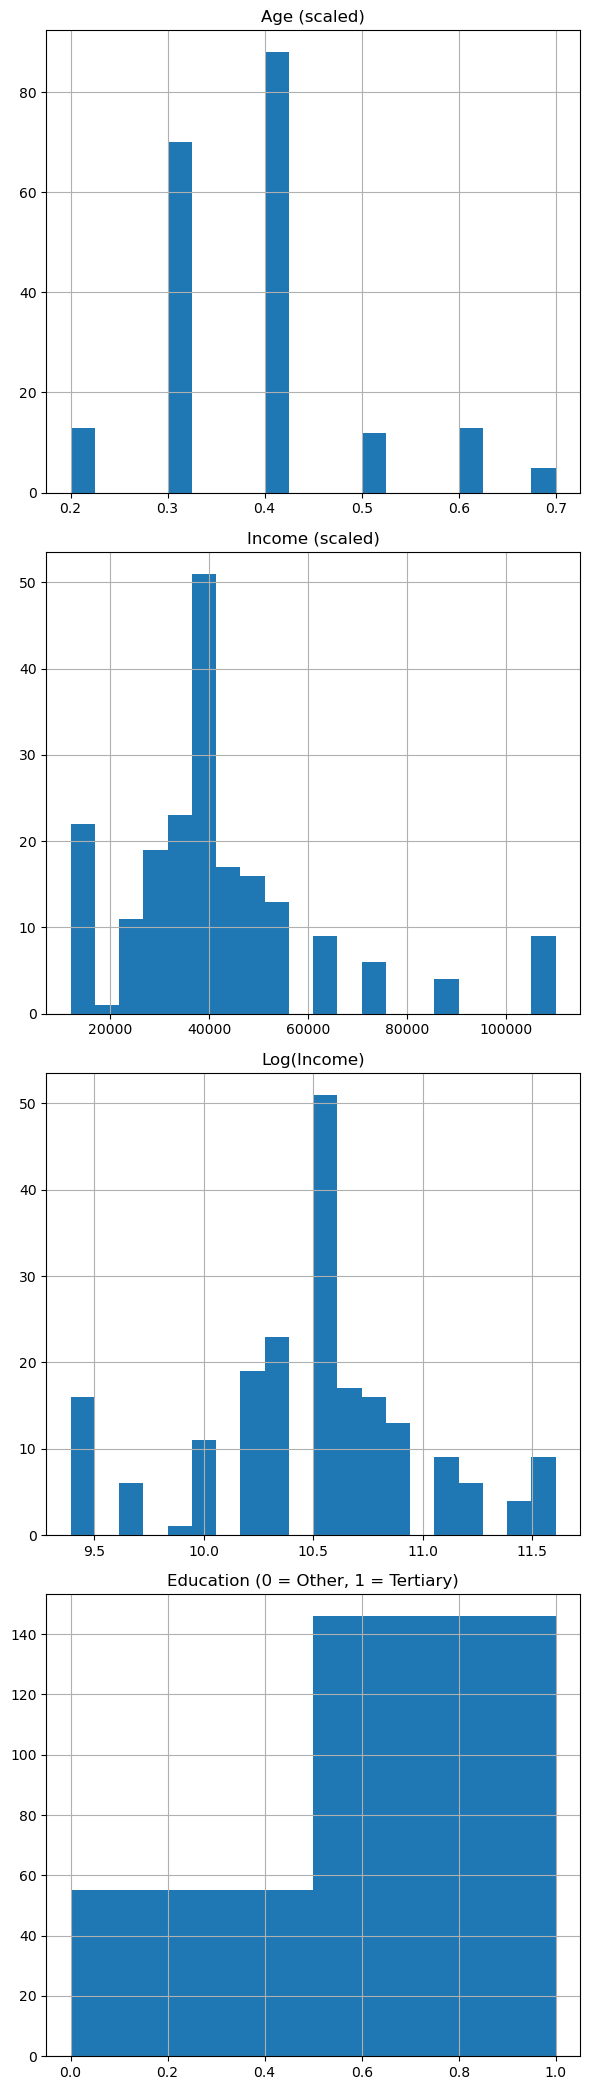

In [12]:
import matplotlib.pyplot as plt
from pandas import DataFrame as frame

fig, ax = plt.subplots(4, figsize=(6, 21))  # 4 plots now

# Age
frame(age).hist(ax=ax[0], bins=20)
ax[0].set_title("Age (scaled)")

# Income (scaled)
frame(income).hist(ax=ax[1], bins=20)
ax[1].set_title("Income (scaled)")

# Log Income
frame(log_income).hist(ax=ax[2], bins=20)
ax[2].set_title("Log(Income)")

# Household size
#frame(size).hist(ax=ax[3], bins=2)
#ax[3].set_title("Household Size (0 = 1-3, 1 = 4 and greater)")

# Gender
#frame(gender).hist(ax=ax[3], bins=2)
#ax[3].set_title("Gender (0 = Male, 1 = Female)")

# Education
frame(edu).hist(ax=ax[3], bins=2)
ax[3].set_title("Education (0 = Other, 1 = Tertiary)")

# Borough location
#frame(location).hist(ax=ax[4], bins=2)
#ax[4].set_title("Borough (0 = Other, 1 = Manchester)")

plt.tight_layout()
plt.show()


In [13]:
print(pd.DataFrame({'Original': edus, 'Mapped': edu}).drop_duplicates())

                                            Original  Mapped
1        Tertiary - postgraduate taught e.g. MSc, MA       1
2                                          Secondary       0
3                           Tertiary - undergraduate       1
4    Tertiary - postgraduate research e.g. MRes, PhD       1
22                                             Other       0
37                                 Prefer not to say       0
161                    Non-vocational qualifications       0


In [14]:
# Check which categories were mapped to which numeric values
#print(pd.DataFrame({'Original': sizes, 'Mapped': size}).drop_duplicates())

In [15]:
pd.DataFrame({'Original': incomes, 'Mapped': income}).drop_duplicates()

,Original,Mapped
1,"less than £15,000",12000
3,"£52,001 - £60,000",56000
4,"£35,001 - £40,000",37500
5,"Greater than £100,000",110000
7,"£45,001 - £52,000",48500
8,Prefer not to say,37500
10,"£40,001 - £45,000",42500
11,"£15,001 - £18,000",16500
13,"£30,001 - £35,000",32500
16,"£60,001 - £70,000",65000


In [16]:
pd.DataFrame({'Original': ages, 'Mapped': age}).drop_duplicates()

,Original,Mapped
1,46-55,0.5
2,56-65,0.6
3,26-35,0.3
12,36-45,0.4
22,Prefer not to say,0.4
38,18-25,0.2
45,>65,0.7


In [17]:
from shortercuts import rc
y=squeeze(array(findex(rc([y30+1]))))
card=squeeze(array(findex(rc([card30]))))
ids=squeeze(array(findex(rc([id30]))))
X0=array(findex(rc([X0_30])))
X1=array(findex(rc([X1_30])))
X2=array(findex(rc([X2_30])))
x=[X0,X1,X2]
Z=array(demog)
J=demog.shape[1]

In [18]:
beta_mean=[0,0,0,0,0]    #prior mean for the wtp parameters
alpha_mean=0                 #prior mean for the scale parameters : note that this is the log or the scale
theta_mean=0                 #prior mean for the opt-out parameters

s=.3
beta_sigma=[s,s,s,s,s]     #prior std for the mean of beta   -wtps
alpha_sigma=1              #prior std for the mean if alpha -scale
theta_sigma=s              #prior std for the mean of theta -opt out

t=0.05
a=[1,1,1,1,1]              #These are gammma priors for the heterogeneous WTPs: 
b=[t,t,t,t,t]       #These are gammma priors for the heterogeneous WTPs: note that mean=a/b and var =a/b**2
a_alpha=1; b_alpha=t;         #These are gammma priors for the heterogeneous scale parameter
a_theta=1; b_theta=t;         #These are gammma priors for the heterogeneous opt out parameters

hdata = {'M': 3, 'N': N, 'K':K, 'T': rows(Y) , 'y': Y, 'ids': ids, 'x':x, 'J':J, 'Z':Z, 
         'beta_mean':beta_mean,'beta_sigma':beta_sigma,
         'alpha_mean':alpha_mean,'alpha_sigma':alpha_sigma,
         'theta_mean':theta_mean,'theta_sigma':theta_sigma,
         'a':a,'b':b,'a_alpha':a_alpha,'b_alpha':b_alpha,'a_theta':a_theta,'b_theta':b_theta, 
         'lower_precision_beta_ivar':  1, #The larger these are the greater the hommogeneity enforced
         'lower_precision_alpha_ivar': 1, #The larger these are the greater the hommogeneity enforced
         'lower_precision_theta_ivar': 1, #The larger these are the greater the hommogeneity enforced
         'lower_beta_bound':-1,           #If the parameters exceed this then this attributes wtp exceeds the largest payment
         'upper_beta_bound': 1,
         'lower_theta_bound':-1,
         'upper_theta_bound':1}

In [19]:
#Out of interest get the maximum likelihood estimates of beta_mu
import time
start=time.time()
mle = model.optimize(data=hdata)
q=mle.stan_variables()
end=time.time()
print('time taken in mins', (end-start)/60,'seconds', end-start)
#q['beta']

16:13:27 - cmdstanpy - INFO - Chain [1] start processing
16:13:32 - cmdstanpy - INFO - Chain [1] done processing
16:13:32 - cmdstanpy - WARNING - The default behavior of CmdStanMLE.stan_variable() will change in a future release to always return a numpy.ndarray, even for scalar variables.
16:13:32 - cmdstanpy - WARNING - The default behavior of CmdStanMLE.stan_variable() will change in a future release to always return a numpy.ndarray, even for scalar variables.
16:13:32 - cmdstanpy - WARNING - The default behavior of CmdStanMLE.stan_variable() will change in a future release to always return a numpy.ndarray, even for scalar variables.
16:13:32 - cmdstanpy - WARNING - The default behavior of CmdStanMLE.stan_variable() will change in a future release to always return a numpy.ndarray, even for scalar variables.
16:13:32 - cmdstanpy - WARNING - The default behavior of CmdStanMLE.stan_variable() will change in a future release to always return a numpy.ndarray, even for scalar variables.
16

time taken in mins 0.08362182776133219 seconds 5.017309665679932


In [20]:
print(hdata.keys())

dict_keys(['M', 'N', 'K', 'T', 'y', 'ids', 'x', 'J', 'Z', 'beta_mean', 'beta_sigma', 'alpha_mean', 'alpha_sigma', 'theta_mean', 'theta_sigma', 'a', 'b', 'a_alpha', 'b_alpha', 'a_theta', 'b_theta', 'lower_precision_beta_ivar', 'lower_precision_alpha_ivar', 'lower_precision_theta_ivar', 'lower_beta_bound', 'upper_beta_bound', 'lower_theta_bound', 'upper_theta_bound'])


In [21]:
#Here we are going to use pathfinder to get some starting points
from cmdstanpy.model import cmdstan_path
pathfinder = model.pathfinder(data=hdata)

16:13:35 - cmdstanpy - INFO - Chain [1] start processing
16:16:34 - cmdstanpy - INFO - Chain [1] done processing


In [22]:
#We are going to run 6 chains
chains=6
pathfinder_inits = pathfinder.create_inits(chains=chains)

In [23]:
#Lets fit the model using the intitialiser from pathfinder
'''
A reminder of all the possible settings
sample(data=None, chains=None, parallel_chains=None, threads_per_chain=None, seed=None, chain_ids=None, inits=None, 
iter_warmup=None, iter_sampling=None, save_warmup=False, thin=None, max_treedepth=None, metric=None, 
step_size=None, adapt_engaged=True, adapt_delta=None, adapt_init_phase=None, adapt_metric_window=None, 
adapt_step_size=None, fixed_param=False, output_dir=None, sig_figs=None, save_latent_dynamics=False, 
save_profile=False, show_progress=True, show_console=False, refresh=None, time_fmt='%Y%m%d%H%M%S', 
timeout=None, *, force_one_process_per_chain=None)
'''
chains=6
start=time.time()
fit=model.sample(data=hdata, chains=chains,iter_warmup=1000, inits=pathfinder_inits,
                 iter_sampling=2000, show_progress=True,output_dir=None,thin=1,adapt_delta=.8,max_treedepth=14)
end=time.time()
print('time taken in mins', (end-start)/60,'seconds', end-start)

16:21:44 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

chain 5 |          | 00:00 Status

chain 6 |          | 00:00 Status

16:50:07 - cmdstanpy - INFO - CmdStan done processing.



time taken in mins 28.84357343117396 seconds 1730.6144058704376


In [24]:
#fit.summary()

In [25]:
z=fit.stan_variables()

In [26]:
outpath='C:\\Users\\n_1ho\\Documents\\biodiversity_model_final_kelvin\\cmdstanpy\\output'  #if you want to change the output
savemodel(z,join(outpath,'z_niko1loadindata3_rescale_Z_DCE2_withage_loginc_edutert_arviz_20251019'))

In [27]:
outpath='C:\\Users\\n_1ho\\Documents\\biodiversity_model_final_kelvin\\cmdstanpy\\output'  #if the outpath was change
z=loadmodel(join(outpath,'z_niko1loadindata3_rescale_Z_DCE2_withage_loginc_edutert_arviz_20251019'))


<Axes: title={'center': 'Opt Out ASC'}>

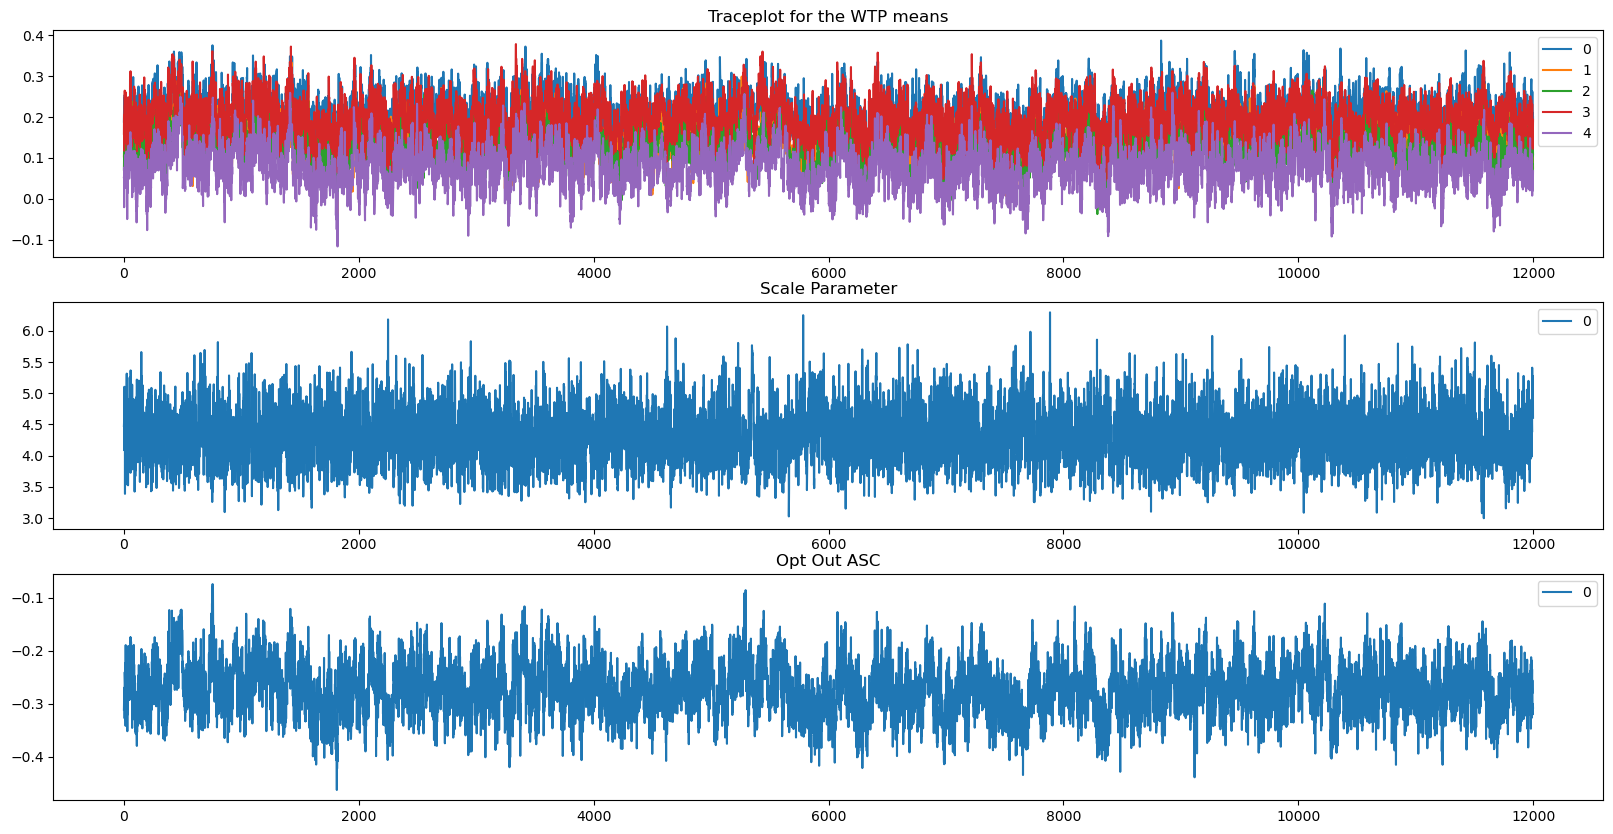

In [28]:
from shortercuts import pltsize
pltsize(10,20)
fig,ax=plt.subplots(3)
frame(z['beta_mu']).plot(title='Traceplot for the WTP means',ax=ax[0])
frame(exp(z['alpha_mu'])).plot(ax=ax[1],title='Scale Parameter')
frame(z['theta_mu']).plot(ax=ax[2],title='Opt Out ASC')

In [29]:
#print(fit.diagnose())

In [30]:
print(z.keys())

dict_keys(['beta', 'beta_mu', 'beta_ivar', 'alpha', 'alpha_mu', 'alpha_ivar', 'theta', 'theta_mu', 'theta_ivar', 'demog_beta_coeffs', 'demog_theta_coeffs', 'mu', 'coef', 'beta_std', 'alpha_std', 'theta_std', 'beta_mu_ind', 'theta_mu_ind', 'log_lik'])


In [34]:
beta_mu= (5/60)*100*frame(z['beta_mu'])
theta_mu= 5*100*frame(z['theta_mu'])
beta_mu.columns=['bees','sparrow','butterflies','hedgehogs','bats']
varnames=beta_mu.columns

cc([beta_mu.describe(),theta_mu.describe()]).round(2)


,bees,sparrow,butterflies,hedgehogs,bats,0
count,12000.00,12000.00,12000.00,12000.00,12000.00,12000.00
mean,1.78,1.14,1.09,1.66,0.64,-136.52
std,0.39,0.39,0.36,0.38,0.41,24.51
min,0.33,-0.37,-0.31,0.33,-0.97,-231.32
25%,1.52,0.87,0.84,1.39,0.37,-153.35
50%,1.77,1.12,1.09,1.65,0.64,-137.13
75%,2.04,1.40,1.33,1.92,0.91,-120.36
max,3.23,2.78,2.58,3.15,2.16,-37.02


In [35]:
beta_mu= 5*100*frame(z['beta_mu'])
theta_mu= 5*100*frame(z['theta_mu'])
beta_mu.columns=['bees','sparrow','butterflies','hedgehogs','bats']
varnames=beta_mu.columns

cc([beta_mu.describe(),theta_mu.describe()]).round(2)

,bees,sparrow,butterflies,hedgehogs,bats,0
count,12000.00,12000.00,12000.00,12000.00,12000.00,12000.00
mean,106.71,68.30,65.27,99.44,38.58,-136.52
std,23.29,23.22,21.86,23.09,24.47,24.51
min,20.01,-22.01,-18.67,19.58,-58.32,-231.32
25%,91.21,52.33,50.47,83.69,22.26,-153.35
50%,106.44,67.38,65.25,99.08,38.32,-137.13
75%,122.43,84.00,79.78,114.94,54.64,-120.36
max,193.56,166.79,154.51,189.25,129.88,-37.02


In [36]:
# 95% credible intervals (2.5% and 97.5%)
beta_ci = beta_mu.quantile([0.025, 0.975]).T
theta_ci = theta_mu.quantile([0.025, 0.975]).T

# Optional: rename columns for clarity
beta_ci.columns = ['2.5%', '97.5%']
theta_ci.columns = ['2.5%', '97.5%']

# Round and display
print("Credible Intervals for beta_mu:")
print(beta_ci.round(2))
print("\nCredible Intervals for theta_mu:")
print(theta_ci.round(2))

Credible Intervals for beta_mu:
              2.5%   97.5%
bees         61.12  152.43
sparrow      24.46  114.58
butterflies  22.86  108.87
hedgehogs    55.45  145.15
bats         -8.58   88.44

Credible Intervals for theta_mu:
    2.5%  97.5%
0 -183.1 -87.57


<Axes: title={'center': 'WTP  to avoid SQ'}, ylabel='Frequency'>

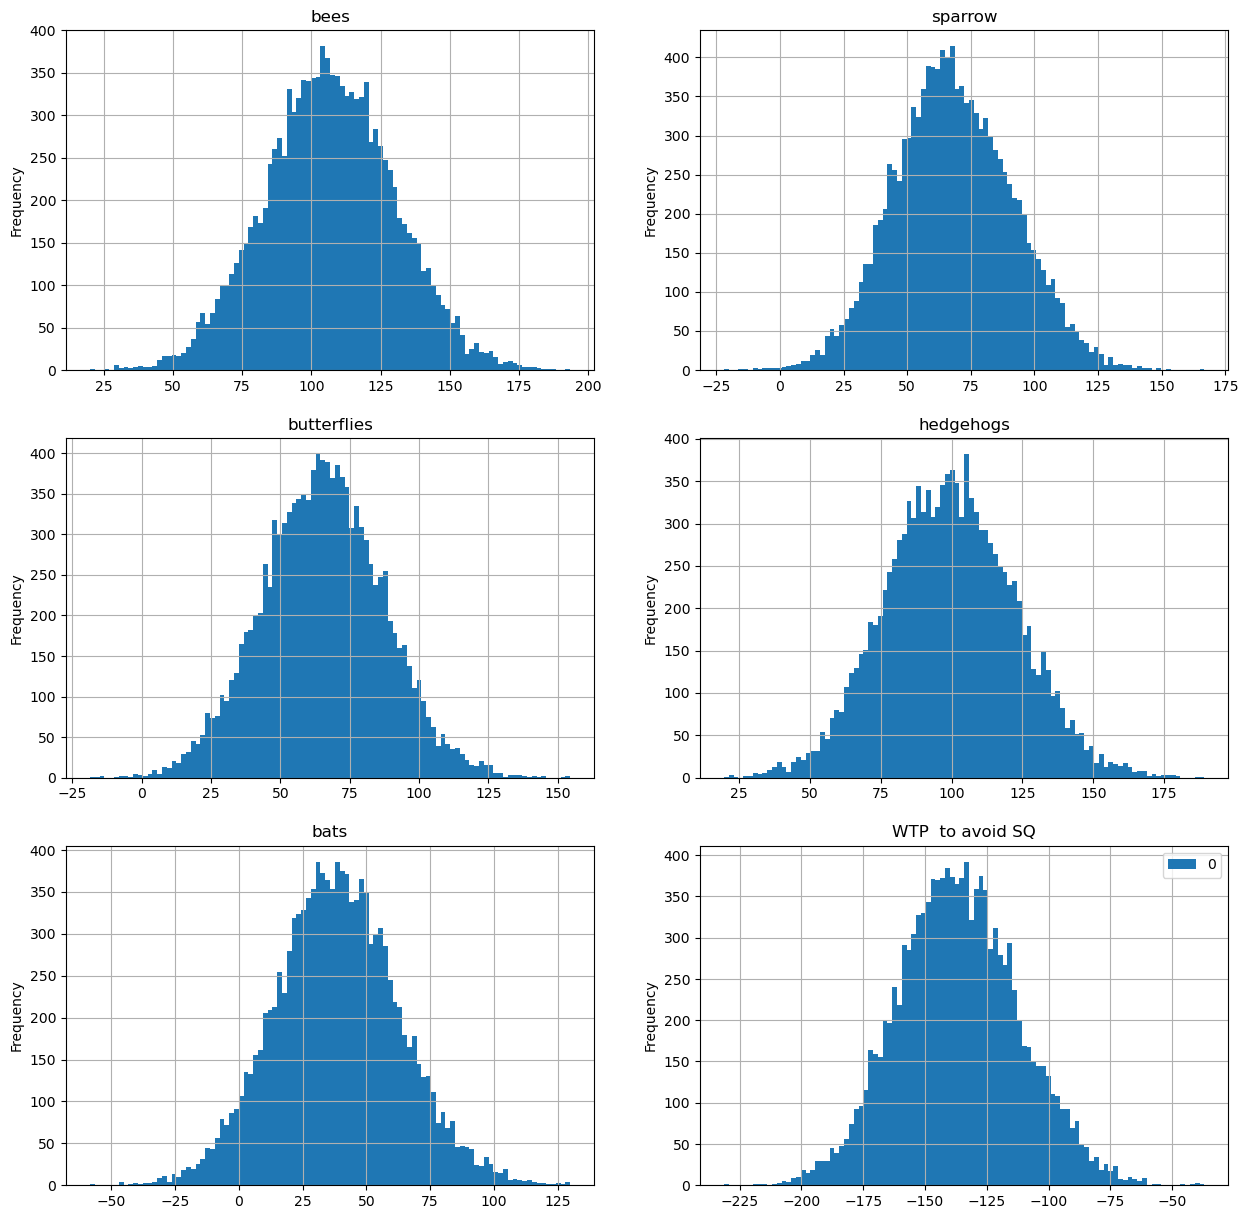

In [37]:
pltsize(15,15)
fig,ax=plt.subplots(3,2)
scale=1
(scale*beta_mu[varnames[0]]).plot(kind='hist',bins=100,ax=ax[0,0],title=varnames[0],grid=True)
(scale*beta_mu[varnames[1]]).plot(kind='hist',bins=100,ax=ax[0,1],title=varnames[1],grid=True)
(scale*beta_mu[varnames[2]]).plot(kind='hist',bins=100,ax=ax[1,0],title=varnames[2],grid=True)
(scale*beta_mu[varnames[3]]).plot(kind='hist',bins=100,ax=ax[1,1],title=varnames[3],grid=True)
(scale*beta_mu[varnames[4]]).plot(kind='hist',bins=100,ax=ax[2,0],title=varnames[4],grid=True)
(scale*theta_mu).plot(kind='hist',grid=True,bins=100,ax=ax[2,1],title='WTP  to avoid SQ')


In [38]:
import arviz as az
idata = az.from_cmdstanpy(posterior=fit)
az.summary(idata, var_names=["demog_beta_coeffs"], round_to=2)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
"demog_beta_coeffs[0, 0]",0.27,0.38,-0.44,0.97,0.01,0.01,1480.33,3703.00,1.00
"demog_beta_coeffs[0, 1]",-0.66,0.39,-1.39,0.06,0.01,0.01,1005.29,2009.57,1.00
"demog_beta_coeffs[0, 2]",0.06,0.36,-0.60,0.76,0.01,0.01,1028.92,2369.29,1.00
"demog_beta_coeffs[0, 3]",0.30,0.38,-0.42,1.03,0.01,0.01,1388.89,2742.38,1.00
"demog_beta_coeffs[0, 4]",0.48,0.40,-0.25,1.25,0.01,0.01,1166.88,2812.33,1.01
"demog_beta_coeffs[1, 0]",-0.01,0.09,-0.18,0.15,0.00,0.00,755.51,1844.79,1.01
"demog_beta_coeffs[1, 1]",0.01,0.09,-0.16,0.18,0.00,0.00,621.55,1809.05,1.01
"demog_beta_coeffs[1, 2]",0.02,0.08,-0.13,0.18,0.00,0.00,584.26,1476.37,1.01
"demog_beta_coeffs[1, 3]",0.05,0.09,-0.11,0.23,0.00,0.00,736.06,2122.77,1.00
"demog_beta_coeffs[1, 4]",-0.00,0.09,-0.19,0.17,0.00,0.00,642.64,2020.27,1.01


In [39]:
# Verify the dimensional structure
idata.posterior["demog_beta_coeffs"].shape

(6, 2000, 3, 5)

In [40]:
# Define readable names
socio_vars = ["Age", "Log income","Edu tertiary"]
attr_names = ["Bumblebees", "Sparrows", "Butterfiles", "Hedgehogs", "Bats"]

# Extract summary table
summary = az.summary(idata, var_names=["demog_beta_coeffs"], round_to=2)

# Add labels
summary["Socio_var"] = [socio_vars[i // len(attr_names)] for i in range(len(summary))]
summary["Attribute"] = [attr_names[i % len(attr_names)] for i in range(len(summary))]

# Clean table
summary = summary[["Socio_var", "Attribute", "mean", "sd", "hdi_3%", "hdi_97%"]]
summary.columns = ["Socio variable", "Attribute", "Mean", "SD", "2.5%", "97.5%"]

print(summary)

                        Socio variable    Attribute  Mean    SD  2.5%  97.5%
demog_beta_coeffs[0, 0]            Age   Bumblebees  0.27  0.38 -0.44   0.97
demog_beta_coeffs[0, 1]            Age     Sparrows -0.66  0.39 -1.39   0.06
demog_beta_coeffs[0, 2]            Age  Butterfiles  0.06  0.36 -0.60   0.76
demog_beta_coeffs[0, 3]            Age    Hedgehogs  0.30  0.38 -0.42   1.03
demog_beta_coeffs[0, 4]            Age         Bats  0.48  0.40 -0.25   1.25
demog_beta_coeffs[1, 0]     Log income   Bumblebees -0.01  0.09 -0.18   0.15
demog_beta_coeffs[1, 1]     Log income     Sparrows  0.01  0.09 -0.16   0.18
demog_beta_coeffs[1, 2]     Log income  Butterfiles  0.02  0.08 -0.13   0.18
demog_beta_coeffs[1, 3]     Log income    Hedgehogs  0.05  0.09 -0.11   0.23
demog_beta_coeffs[1, 4]     Log income         Bats -0.00  0.09 -0.19   0.17
demog_beta_coeffs[2, 0]   Edu tertiary   Bumblebees  0.40  0.11  0.20   0.60
demog_beta_coeffs[2, 1]   Edu tertiary     Sparrows  0.12  0.10 -0.07   0.30

array([<Axes: title={'center': '94.0% HDI'}>], dtype=object)

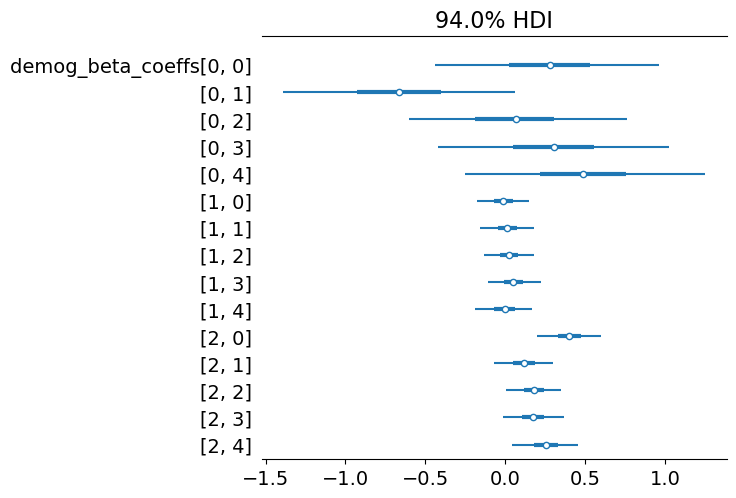

In [41]:
az.plot_forest(fit, var_names=["demog_beta_coeffs"], combined=True)

In [42]:
#If you want the rhat values for beta_my which is a two dimensional array, 
r_hat2(z,'beta_mu',chains)

(12000, 5)


[['beta_mu', 1, 1.0097567784649537],
 ['beta_mu', 2, 1.0041886508453803],
 ['beta_mu', 3, 1.0109026026779406],
 ['beta_mu', 4, 1.0080397037467501],
 ['beta_mu', 5, 1.0084717240257954]]

In [43]:
r_hat1(z,'alpha_mu',chains)

(12000,)


['alpha_mu', 1.0016628881725291]

In [44]:
w=WAICf(z['log_lik']) 
#Look at the WAIC, note that my WAIC (produced here) gives the same results canned software for simple models
#However, I have had some divergences for some more complex models, though I am not sure why

In [45]:
#print WAIC
print(f"WAIC: {w}")

WAIC: (         waic        elpd     p_waic1     p_waic2   maxloglik    se_waic
0  2248.79972 -1124.39986  213.481417  264.512569 -862.939192  50.877119, array([[-0.26184404],
       [-0.47212239],
       [-0.21567001],
       ...,
       [-1.58591518],
       [-0.55542653],
       [-0.48909743]]))


In [46]:
#import arviz as az

#  pointwise log-likelihood saved in fit
loo_result = az.loo(fit)
print(loo_result)

Computed from 12000 posterior samples and 1608 observations log-likelihood matrix.

         Estimate       SE
elpd_loo -1162.39    27.02
p_loo      302.50        -

There has been a warning during the calculation. Please check the results.
------

Pareto k diagnostic values:
                         Count   Pct.
(-Inf, 0.70]   (good)     1498   93.2%
   (0.70, 1]   (bad)       110    6.8%
   (1, Inf)   (very bad)    0    0.0%



In [47]:
waic_result = az.waic(fit)
print(waic_result)

Computed from 12000 posterior samples and 1608 observations log-likelihood matrix.

          Estimate       SE
elpd_waic -1124.38    25.44
p_waic      264.49        -

There has been a warning during the calculation. Please check the results.


In [48]:
betas=[]
for k in range(shape(z['beta'])[2]):
    beta1=[]
    for i in range(shape(z['beta'])[1]):
        beta1+=[float(z['beta'][:,i,k].mean())]
    betas+=[beta1]
betas=(500/60)*frame(betas) .T
betas.columns=beta_mu.columns
#betas

<Axes: ylabel='Frequency'>

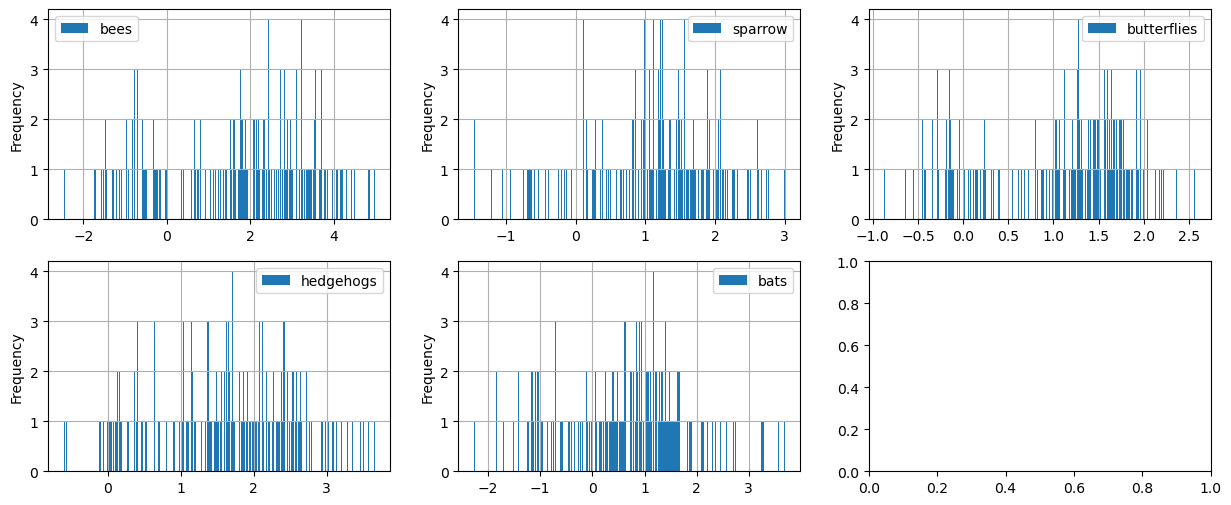

In [49]:
pltsize(6,15)
fig,ax=plt.subplots(2,3)
['bees','sparrow','butterflies','hedgehogs','bats']
betas.plot(kind='hist',y='bees',bins=383,ax=ax[0,0],grid=True)
betas.plot(kind='hist',y='sparrow',bins=383,ax=ax[0,1],grid=True)
betas.plot(kind='hist',y='butterflies',bins=383,ax=ax[0,2],grid=True)
betas.plot(kind='hist',y='hedgehogs',bins=383,ax=ax[1,0],grid=True)
betas.plot(kind='hist',y='bats',bins=383,ax=ax[1,1],grid=True)


In [50]:
exp(1)

2.718281828459045

In [51]:
exp(1+1/2)

4.4816890703380645

In [52]:
x[0]

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [53]:
x[2]

array([[-0.1       ,  0.        ,  0.41666667, ...,  0.41666667,
         0.        ,  0.        ],
       [-1.        ,  1.        ,  0.        , ...,  0.        ,
         0.58333333,  0.        ],
       [-0.05      ,  0.        ,  0.        , ...,  0.        ,
         0.16666667,  0.        ],
       ...,
       [-0.4       ,  0.        ,  0.        , ...,  0.58333333,
         0.        ,  0.        ],
       [-0.6       ,  1.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.4       ,  0.        ,  0.        , ...,  1.        ,
         0.        ,  0.        ]])

In [54]:
az.summary(idata, var_names=["beta_ivar", "theta_ivar", "alpha_ivar"])

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
beta_ivar[0],21.084,9.033,8.719,36.587,0.411,0.291,530.0,893.0,1.01
beta_ivar[1],51.833,23.850,16.008,95.216,1.309,0.926,322.0,927.0,1.01
beta_ivar[2],57.941,26.552,18.146,107.888,1.365,0.966,347.0,971.0,1.01
beta_ivar[3],34.529,18.429,10.472,67.785,1.017,0.720,346.0,653.0,1.01
beta_ivar[4],35.600,18.897,9.870,69.892,0.903,0.639,404.0,869.0,1.01
theta_ivar,7.838,1.312,5.546,10.388,0.038,0.027,1151.0,3500.0,1.01
alpha_ivar,1.174,0.178,1.000,1.493,0.004,0.003,2677.0,3836.0,1.00
